In [ ]:
!pip install kagglehub

## Importation des donnees

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahulvyasm/netflix-movies-and-tv-shows")

print("Path to dataset files:", path)

100%|██████████| 1.35M/1.35M [00:00<00:00, 93.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rahulvyasm/netflix-movies-and-tv-shows/versions/1


In [ ]:
import pandas as pd
import os

# Construct the file path using the correct filename
file_path = os.path.join(path, "netflix_titles.csv")

# List files in the directory to check the actual filename (optional, already confirmed)
print("Files in the dataset directory:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

df = pd.read_csv(file_path, encoding='latin1')
df.head()

Files in the dataset directory:
/root/.cache/kagglehub/datasets/rahulvyasm/netflix-movies-and-tv-shows/versions/1/netflix_titles.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# La distribution des variables categoricielle
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8809,8809,8809,6175,7984,7978,8799,8805,8806,8809,8809
unique,8809,2,8806,4529,7694,748,1768,18,220,516,8777
top,s8809,Movie,22-Jul,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6132,2,19,19,2819,109,3208,1794,362,4


In [ ]:
df.shape

(8809, 26)

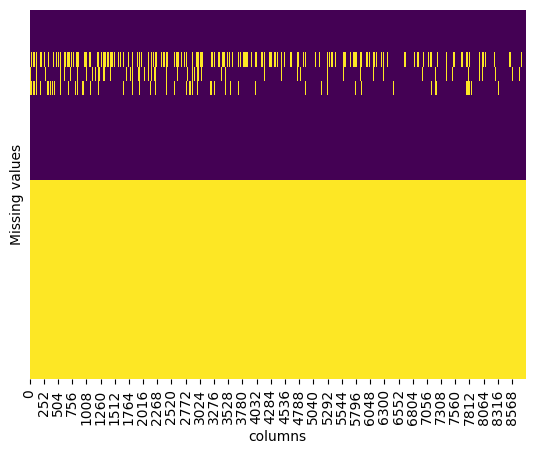

In [ ]:
# Missing values
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(df.isnull().transpose(), yticklabels=False, cbar=False, cmap='viridis', ax=ax)
plt.xlabel("columns")
plt.ylabel("Missing values")

plt.show()

In [ ]:
movies = df.copy()
movies.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
movies_df = movies[["show_id","type","title","country","date_added","rating","duration","listed_in","description"]]
movies_df

,show_id,type,title,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,South Korea,"April 5, 2024",TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


In [ ]:
# La distribution des variables categoricielle
movies_df.describe(include='object')

In [ ]:
movies_missing = movies_df[movies_df["country"].isna()]
movies_missing

,show_id,type,title,country,date_added,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,NaN,"September 24, 2021",TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,NaN,"September 24, 2021",PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,NaN,"August 9, 2019",TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,NaN,"February 1, 2019",TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"June 23, 2018",TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"June 7, 2018",TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [ ]:
movies_df["listed_in"].value_counts().reset_index().sort_values("count", ascending=False)

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
...,...,...
479,"Anime Series, International TV Shows, Spanish-...",1
512,"Classic Movies, Dramas, LGBTQ Movies",1
513,"Action & Adventure, Classic Movies, Internatio...",1
514,"Action & Adventure, Cult Movies",1


In [ ]:
movies_df["words_in_description"] = movies_df["description"].apply(lambda x: len(x.split()))
movies_df

/tmp/ipython-input-8-3732114533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df["words_in_description"] = movies_df["description"].apply(lambda x: len(x.split()))


,show_id,type,title,country,date_added,rating,duration,listed_in,description,words_in_description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",27
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",27
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,27
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24
4,s5,TV Show,Kota Factory,India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24
...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,25
8805,s8806,Movie,Zoom,United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",26
8806,s8807,Movie,Zubaan,India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,25
8807,s8808,TV Show,Parasyte: The Grey,South Korea,"April 5, 2024",TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...,21


In [ ]:
movies_df.loc[movies_df["words_in_description"].between(1,15), ["description","listed_in"]]


,description,listed_in
324,Paw-esome tales abound when singing furry frie...,Kids' TV
820,"A programming genius builds a fact-finding, tr...","International TV Shows, TV Dramas, TV Mysteries"
1484,Animation and activism unite in this multimedi...,Dramas
1771,This docuseries spotlights Afro-Brazilian thin...,"Docuseries, International TV Shows"
2373,The Sultan of Egypt and Syria launches a campa...,"Action & Adventure, Classic Movies, Dramas"
2832,An inseparable couple struggles to stay togeth...,"Dramas, International Movies, Romantic Movies"
2992,"Three wealthy, power-hungry men tussle for sov...","International TV Shows, TV Dramas"
3007,A detective interrogates a monkey who is suspe...,"Dramas, Independent Movies"
3458,Eight undocumented families' fates roller-coas...,Docuseries
3463,"Three best friends look for love, laughs and s...","International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
movies_df_25_words = movies_df[movies_df["words_in_description"] >= 15]

In [ ]:
movies_df_25_words = movies_df_25_words.dropna(subset=["date_added"])

In [ ]:

movies_df_25_words["year_added"] = movies_df_25_words["date_added"].apply(lambda x: x.split(",")[-1])
movies_df_25_words

,show_id,type,title,country,date_added,rating,duration,listed_in,description,words_in_description,year_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",27,2021
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",27,2021
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,27,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,2021
4,s5,TV Show,Kota Factory,India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,2021
...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,25,2019
8805,s8806,Movie,Zoom,United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",26,2020
8806,s8807,Movie,Zubaan,India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,25,2019
8807,s8808,TV Show,Parasyte: The Grey,South Korea,"April 5, 2024",TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...,21,2024


In [ ]:
movies_df_25_words["tagged_description"] = movies_df_25_words[["show_id","description"]].astype(str).agg(" ".join, axis=1)

In [ ]:
(
    movies_df_25_words
    .drop(["country", "date_added","words_in_description"], axis=1)
    .to_csv("movies_df_25_words.csv", index=False)
)

## Vector Search

In [ ]:
%pip install -U langchain-community langchain-chroma langchain-google-genai

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

In [ ]:
from google.colab import userdata
HF_TOKEN = userdata.get('HF_TOKEN')

In [ ]:
import pandas as pd
movies = pd.read_csv("movies_df_25_words.csv")


In [ ]:
movies["tagged_description"]

,tagged_description
0,"s1 As her father nears the end of his life, fi..."
1,"s2 After crossing paths at a party, a Cape Tow..."
2,s3 To protect his family from a powerful drug ...
3,"s4 Feuds, flirtations and toilet talk go down ..."
4,s5 In a city of coaching centers known to trai...
...,...
8784,s8805 Looking to survive in a world taken over...
8785,"s8806 Dragged from civilian life, a former sup..."
8786,s8807 A scrappy but poor boy worms his way int...
8787,s8808 A new breed of parasitic aliens arrive o...


In [ ]:
movies["tagged_description"].to_csv(
    "tagged_description.txt",
    sep = "\n",
    index=False,
    header=False
)

In [ ]:
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [142]:
from langchain_huggingface import HuggingFaceEmbeddings

persist_directory = "chroma_db_books2"

db_books = Chroma.from_documents(
    documents,
    embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"),
    persist_directory=persist_directory
)

In [136]:
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

persist_directory = "chroma_db_books"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

db_books = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

print(f"Chroma database loaded from: {persist_directory}")

Chroma database loaded from: chroma_db_books


In [140]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k=5)
docs

[Document(id='2d06cf18-307d-4c99-90f1-fc7fd2bc6d58', metadata={'source': 'tagged_description.txt'}, page_content='s1705 As urbanization expands throughout society, this documentary discusses the value of finding ways for children to forge real connections with nature.'),
 Document(id='c848f494-1432-4b4d-b612-790c4ac8f493', metadata={'source': 'tagged_description.txt'}, page_content='s1705 As urbanization expands throughout society, this documentary discusses the value of finding ways for children to forge real connections with nature.'),
 Document(id='e9c0b2e6-1de4-460d-ba89-1150521df929', metadata={'source': 'tagged_description.txt'}, page_content='s1705 As urbanization expands throughout society, this documentary discusses the value of finding ways for children to forge real connections with nature.'),
 Document(id='4a9d8603-cc75-4ac8-a215-158f6b8474f4', metadata={'source': 'tagged_description.txt'}, page_content='s3919 Unexpected wildlife adventures and valuable life lessons await s

In [155]:
from transformers import pipeline
# Determine the device to use
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
classifier = pipeline("text-classification",
                      model = "j-hartmann/emotion-english-distilroberta-base",
                      top_k = None,
                      device = device
                      )

Using device: cuda


Device set to use cuda


In [160]:
classifier(movies["description"][0])[0][0]['label']

'sadness'

In [161]:
movies['emotion'] = movies['description'].apply(lambda x: classifier(x)[0][0]['label'])

In [162]:
movies.to_csv("movies_with_emotions.csv", index=False)

In [173]:
def emo(movies_list, emotion):
    movies_recs = movies[movies["show_id"].isin(movies_list)].copy()
    # Sort by the 'emotion' column instead of a specific emotion
    movies_recs.sort_values(by="emotion", ascending=False, inplace=True)

In [176]:
%%writefile streamlit_dashboard.py
import streamlit as st
import pandas as pd
import numpy as np
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings
import torch
from transformers import pipeline

# Load data and vector database
movies = pd.read_csv("movies_with_emotions.csv")
#books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
#books["large_thumbnail"] = np.where(
 #   books["thumbnail"].isna(),
##    "https://via.placeholder.com/150", # Use a placeholder image
#    books["large_thumbnail"],
#)

persist_directory = "chroma_db_books2"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
db_movies = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)


def retrieve_semantic_recommendations(
    query: str,
    category: str = None,
    movie_type: str = None,
    tone: str = None,
    initial_top_k: int = 50,
    final_top_k: int = 20,
) -> pd.DataFrame:
  """
    Retrieves book recommendations based on semantic similarity, category, and tone.

    Args:
        query: The user's query for book recommendations.
        category: The desired book category (e.g., "Fiction", "Nonfiction", "All").
        movie_type: The desired type ('Movie', 'TV Show', or 'All').
        tone: The desired emotional tone (e.g., "Happy", "Sad", "Angry", "Suspenseful", "Surprising", "All").
        initial_top_k: The initial number of similar books to retrieve from the vector database.
        final_top_k: The final number of recommendations to return after filtering and sorting.

    Returns:
        A pandas DataFrame containing the recommended books.
    """
  recs = db_movies.similarity_search(query, k=initial_top_k)
  movies_list = [rec.page_content.split()[0] for rec in recs]
  movies_recs = movies[movies["show_id"].isin(movies_list)].copy() # Use .copy() to avoid SettingWithCopyWarning

  if category != "All":
    movies_recs = movies_recs[movies_recs["categorie"] == category]

  if movie_type != "All":
      movies_recs = movies_recs[movies_recs["type"] == movie_type]

  if tone != "All":
      movies_recs = movies_recs[movies_recs["emotion"] == tone.lower()]

  return movies_recs.head(final_top_k)


def recommended_book(query, category, movie_type, tone):
  """
    Generates formatted recommendations for display in the Streamlit UI.

    Args:
        query: The user's query.
        category: The selected category.
        movie_type: The selected movie type.
        tone: The selected tone.

    Returns:
        A list of tuples, where each tuple contains a formatted caption and the thumbnail URL.
    """
  recommendations = retrieve_semantic_recommendations(query, category, movie_type, tone)
  results = []
  for _, row in recommendations.iterrows():
    description = row["description"]
    truncated_desc_split = description.split()
    truncated_description = " ".join(truncated_desc_split[:30]) + "..."

    authors_split = row["rating"].split(";")
    if len(authors_split) == 2:
      authors_str = f"{authors_split[0]} and {authors_split[1]}"
    elif len(authors_split) > 2:
      authors_str = ", ".join(authors_split[:-1]) + f", and {authors_split[-1]}"
    else:
      authors_str = str(row["rating"]) # Ensure authors is a string

    caption = f"{row['title']} by {authors_str}: {truncated_description}"
    results.append((caption))
  return results

# Streamlit UI
st.title("Semantic Book Recommendation System")

# Input widgets
user_query = st.text_input("Please enter a description of a book", placeholder="e.g., A story about forgiveness")

categories = ["All"] + sorted(movies["categorie"].unique().tolist())
category_dropdown = st.selectbox("Select a category", categories)

movie_types = ["All"] + sorted(movies["type"].unique().tolist())
type_dropdown = st.selectbox("Select a Type", movie_types)

tones = ["All"] + movies["emotion"].unique().tolist()
tone_dropdown = st.selectbox("Select a Tone", tones)

submit_button = st.button("Find Recommendations")

# Display recommendations
st.markdown("## Recommendations")

if submit_button and user_query:
    recommendations = recommended_book(user_query, category_dropdown, type_dropdown, tone_dropdown)
    if recommendations:
        # Display recommendations in columns
        cols = st.columns(5) # Adjust the number of columns as needed
        for i, (caption) in enumerate(recommendations):
            with cols[i % 5]: # Distribute across columns
                #st.image(caption=caption, use_container_width=True)
                st.write(caption)
    else:
        st.write("No recommendations found for your criteria.")
elif submit_button and not user_query:
    st.write("Please enter a description to get recommendations.")

Overwriting streamlit_dashboard.py


In [175]:
from pyngrok import ngrok
import subprocess
import os
from google.colab import userdata

ngrok.set_auth_token("2zyW3NcBgBEC5qLnoWc9cYSlnXe_QnZTTwKyyenzTfNiNhCK")
public_url = ngrok.connect(8501)
print(f"🔗 Streamlit application accessible here: {public_url}")

    # Run the Streamlit application
    # Use subprocess to run the streamlit command in the background
    # so that the cell doesn't block indefinitely
process = subprocess.Popen(['streamlit', 'run', 'streamlit_dashboard.py'])

    # To stop the Streamlit app and ngrok tunnel, you would typically interrupt
    # the kernel or run code to terminate the subprocess and ngrok.
    # For simplicity here, we'll just indicate it's running.
print("Streamlit application is running...")


🔗 Streamlit application accessible here: NgrokTunnel: "https://86b84b264bcb.ngrok-free.app" -> "http://localhost:8501"
Streamlit application is running...


Now that the database is saved, you can load it directly using the following code:

In [145]:
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

persist_directory = "chroma_db_books2"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

db_books_loaded = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

print(f"Chroma database loaded from: {persist_directory}")

Chroma database loaded from: chroma_db_books2


You can now perform similarity searches on the loaded database:

In [148]:
query = "murder"
docs = db_books_loaded.similarity_search(query, k=5)
print(docs)

[Document(id='58897649-b89a-4dee-9a48-f47cc4bf85a6', metadata={'source': 'tagged_description.txt'}, page_content="s3313 Taken into custody, a murder suspect's theatrical explanations of his peculiar modus operandi unearth truths far beyond the crime heâ\x80\x99s accused of."), Document(id='9daf829c-0321-43b5-97d5-a66825a93a44', metadata={'source': 'tagged_description.txt'}, page_content="s3313 Taken into custody, a murder suspect's theatrical explanations of his peculiar modus operandi unearth truths far beyond the crime heâ\x80\x99s accused of."), Document(id='ceaed48d-788f-42c2-b8a2-6635558b7a9f', metadata={'source': 'tagged_description.txt'}, page_content="s2671 A timid, small-town comedian's long-awaited big break takes a dark turn when he realizes committing murder is the only way to keep his onstage mojo."), Document(id='cedd115c-dc88-42f7-8bcf-440613e90e52', metadata={'source': 'tagged_description.txt'}, page_content="s2671 A timid, small-town comedian's long-awaited big break t

# Task
Rewrite the provided Python code to create a web application with a JavaScript frontend and a FastAPI backend for semantic search and recommendation based on user queries and filters (category, type, emotion).

## Plan the backend (fastapi)

### Subtask:
Design the API endpoints for receiving user queries and filters, performing the semantic search and emotion analysis, and returning recommendations.


**Reasoning**:
Define the FastAPI application and the recommendations endpoint with the specified parameters and response structure.



In [177]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Optional

app = FastAPI()

class RecommendationRequest(BaseModel):
    query: str
    category: Optional[str] = "All"
    movie_type: Optional[str] = "All"
    tone: Optional[str] = "All"

class MovieRecommendation(BaseModel):
    show_id: str
    title: str
    rating: Optional[str]
    duration: Optional[str]
    listed_in: str
    description: str
    year_added: Optional[str]
    emotion: Optional[str]

@app.post("/recommendations", response_model=List[MovieRecommendation])
async def get_recommendations(request: RecommendationRequest):
    # Placeholder for semantic search and filtering logic
    # This will be implemented in the next subtask
    recommended_movies = []

    # Example of how the data would be structured
    # In the next subtask, this will be populated by the search and filtering
    if request.query == "example":
        recommended_movies = [
            MovieRecommendation(
                show_id="s1",
                title="Example Movie 1",
                rating="PG-13",
                duration="90 min",
                listed_in="Documentaries",
                description="This is an example movie description.",
                year_added="2021",
                emotion="neutral"
            ),
            MovieRecommendation(
                show_id="s2",
                title="Example Movie 2",
                rating="TV-MA",
                duration="2 Seasons",
                listed_in="International TV Shows",
                description="Another example movie description.",
                year_added="2021",
                emotion="sadness"
            ),
        ]

    if not recommended_movies:
        # In a real application, you might return an empty list or a specific message
        # For this example, we'll raise an HTTPException if no results are found
        raise HTTPException(status_code=404, detail="No recommendations found for the given criteria.")


    return recommended_movies


## Implement the backend (fastapi)

### Subtask:
Write the Python code for the FastAPI application, including loading the vector database and the movie data, implementing the recommendation logic (similar to the current Python function but adapted for an API), and defining the API endpoints.


**Reasoning**:
Implement the FastAPI application with the recommendation logic by loading the data and the vector database and defining the endpoint with the filtering and search logic as described in the instructions.



In [178]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from typing import List, Optional
import pandas as pd
from langchain_chroma import Chroma
from langchain_huggingface import HuggingFaceEmbeddings

app = FastAPI()

class RecommendationRequest(BaseModel):
    query: str
    category: Optional[str] = "All"
    movie_type: Optional[str] = "All"
    tone: Optional[str] = "All"

class MovieRecommendation(BaseModel):
    show_id: str
    title: str
    rating: Optional[str]
    duration: Optional[str]
    listed_in: str
    description: str
    year_added: Optional[str]
    emotion: Optional[str]

# Load data and vector database
movies = pd.read_csv("movies_with_emotions.csv")

persist_directory = "chroma_db_books2"
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")
db_movies = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

@app.post("/recommendations", response_model=List[MovieRecommendation])
async def get_recommendations(request: RecommendationRequest):
    # Perform semantic search
    initial_top_k = 50
    recs = db_movies.similarity_search(request.query, k=initial_top_k)
    movies_list = [rec.page_content.split()[0] for rec in recs]
    movies_recs = movies[movies["show_id"].isin(movies_list)].copy()

    # Filter based on category, type, and tone
    if request.category != "All":
        movies_recs = movies_recs[movies_recs["listed_in"].str.contains(request.category, case=False, na=False)]

    if request.movie_type != "All":
        movies_recs = movies_recs[movies_recs["type"] == request.movie_type]

    if request.tone != "All":
        movies_recs = movies_recs[movies_recs["emotion"] == request.tone.lower()]

    # Limit to final_top_k recommendations
    final_top_k = 20
    movies_recs = movies_recs.head(final_top_k)

    # Prepare recommendations as a list of MovieRecommendation objects
    recommended_movies = []
    for _, row in movies_recs.iterrows():
        recommended_movies.append(
            MovieRecommendation(
                show_id=row["show_id"],
                title=row["title"],
                rating=row["rating"],
                duration=row["duration"],
                listed_in=row["listed_in"],
                description=row["description"],
                year_added=row["year_added"],
                emotion=row["emotion"]
            )
        )

    if not recommended_movies:
        raise HTTPException(status_code=404, detail="No recommendations found for the given criteria.")

    return recommended_movies

## Plan the frontend (javascript)

### Subtask:
Design the user interface for the web application, including input fields for the query, dropdowns for filters (category, type, emotion), a button to trigger the search, and an area to display the recommendations.


**Reasoning**:
I need to design the user interface for the web application. I will outline the main sections and the HTML elements for each control, define the options for the filter dropdowns, and describe how the recommendations will be displayed. This will be done in a markdown cell to describe the UI design.



**Reasoning**:
The previous command failed due to a `SyntaxError` in the markdown block. I need to correct the markdown syntax to properly define the user interface. I will enclose the markdown content within triple backticks to ensure it is interpreted as a markdown block within the code cell.



In [181]:
# ```markdown
# ## User Interface Design

# The user interface for the web application will be divided into three main sections:

# ### Header

# A simple header displaying the title of the application, e.g., "Movie Recommendation System".

# ### Input Controls

# This section will contain the controls for the user to input their query and select filters.

# -   **Query Input:** An `<input type="text">` element where the user can type their description or query for movie recommendations. It should have a placeholder text like "Enter a description of a movie".
# -   **Category Filter:** A `<select>` dropdown for filtering by movie category. The options will include:
#     -   "All" (default)
#     -   Unique values from the `listed_in` column in the dataset (e.g., "Documentaries", "International TV Shows", "Crime TV Shows", etc.).
# -   **Type Filter:** A `<select>` dropdown for filtering by content type. The options will include:
#     -   "All" (default)
#     -   "Movie"
#     -   "TV Show"
# -   **Emotion Filter:** A `<select>` dropdown for filtering by the predicted emotion of the movie description. The options will include:
#     -   "All" (default)
#     -   Unique values from the 'emotion' column in the dataset (e.g., "sadness", "disgust", "anger", "neutral", "fear", etc.).
# -   **Search Button:** A `<button>` element with the text "Find Recommendations" to trigger the recommendation process.

# ### Results Display

# This section will display the movie recommendations based on the user's input and filters.

# -   The recommendations will be presented as a list or a grid of individual movie entries.
# -   Each movie entry will display:
#     -   The movie **Title**.
#     -   A **truncated Description** (e.g., the first 30 words followed by "...").
#     -   Other relevant information like **Rating**.

# ### User Experience Considerations

# -   When the search button is clicked, a loading indicator can be displayed to show that the system is processing the request.
# -   If no recommendations are found, a message will be displayed to the user (e.g., "No recommendations found for your criteria.").
# -   The layout should be responsive to different screen sizes.

## Set up the frontend project

### Subtask:
Choose a JavaScript framework (e.g., React, Vue, or just plain JavaScript) and set up the project structure.


**Reasoning**:
Set up the frontend project structure by creating the necessary files and linking them in the HTML.



In [182]:
import os

# Create the frontend directory
if not os.path.exists("frontend"):
    os.makedirs("frontend")

# Create the index.html file
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Movie Recommendation System</title>
    <link rel="stylesheet" href="style.css">
</head>
<body>
    <header>
        <h1>Movie Recommendation System</h1>
    </header>
    <main>
        <section class="controls">
            <input type="text" id="query-input" placeholder="Enter a description of a movie">
            <select id="category-filter">
                <option value="All">All Categories</option>
            </select>
            <select id="type-filter">
                <option value="All">All Types</option>
                <option value="Movie">Movie</option>
                <option value="TV Show">TV Show</option>
            </select>
            <select id="emotion-filter">
                <option value="All">All Tones</option>
            </select>
            <button id="search-button">Find Recommendations</button>
        </section>
        <section class="results">
            <h2>Recommendations</h2>
            <div id="recommendations-list">
                <!-- Recommendations will be displayed here -->
            </div>
        </section>
    </main>
    <script src="script.js"></script>
</body>
</html>
"""
with open("frontend/index.html", "w") as f:
    f.write(html_content)

# Create the script.js file
js_content = """
document.addEventListener('DOMContentLoaded', () => {
    const queryInput = document.getElementById('query-input');
    const categoryFilter = document.getElementById('category-filter');
    const typeFilter = document.getElementById('type-filter');
    const emotionFilter = document.getElementById('emotion-filter');
    const searchButton = document.getElementById('search-button');
    const recommendationsList = document.getElementById('recommendations-list');

    // Function to fetch filter options from the backend (will be implemented later)
    async function fetchFilterOptions() {
        // Placeholder for fetching categories and emotions from the backend
        // For now, we'll use some dummy data or populate based on the existing CSV
        // This part will be updated when the backend endpoints for filters are ready
        const dummyCategories = ["Dramas", "Documentaries", "Comedies", "Action & Adventure"];
        const dummyEmotions = ["sadness", "disgust", "anger", "neutral", "fear"];

        dummyCategories.forEach(cat => {
            const option = document.createElement('option');
            option.value = cat;
            option.textContent = cat;
            categoryFilter.appendChild(option);
        });

        dummyEmotions.forEach(emo => {
            const option = document.createElement('option');
            option.value = emo;
            option.textContent = emo.charAt(0).toUpperCase() + emo.slice(1); // Capitalize
            emotionFilter.appendChild(option);
        });
    }

    // Function to fetch recommendations from the backend
    async function fetchRecommendations() {
        const query = queryInput.value;
        const category = categoryFilter.value;
        const type = typeFilter.value;
        const tone = emotionFilter.value;

        recommendationsList.innerHTML = 'Loading...'; // Show loading indicator

        try {
            const response = await fetch('/recommendations', { // Assuming the backend is on the same host/port
                method: 'POST',
                headers: {
                    'Content-Type': 'application/json'
                },
                body: JSON.stringify({
                    query: query,
                    category: category,
                    movie_type: type,
                    tone: tone
                })
            });

            if (!response.ok) {
                if (response.status === 404) {
                     recommendationsList.innerHTML = 'No recommendations found for your criteria.';
                } else {
                    throw new Error(`HTTP error! status: ${response.status}`);
                }
                return;
            }

            const recommendations = await response.json();

            displayRecommendations(recommendations);

        } catch (error) {
            console.error('Error fetching recommendations:', error);
            recommendationsList.innerHTML = 'Error fetching recommendations.';
        }
    }

    // Function to display recommendations
    function displayRecommendations(recommendations) {
        recommendationsList.innerHTML = ''; // Clear previous results
        if (recommendations.length === 0) {
            recommendationsList.innerHTML = 'No recommendations found.';
            return;
        }

        recommendations.forEach(movie => {
            const movieElement = document.createElement('div');
            movieElement.classList.add('movie-recommendation');

            const titleElement = document.createElement('h3');
            titleElement.textContent = movie.title;

            const descriptionElement = document.createElement('p');
            const truncatedDescription = movie.description.split(' ').slice(0, 30).join(' ') + '...';
            descriptionElement.textContent = truncatedDescription;

            const detailsElement = document.createElement('p');
            detailsElement.innerHTML = `<strong>Rating:</strong> ${movie.rating || 'N/A'} | <strong>Duration:</strong> ${movie.duration || 'N/A'} | <strong>Listed In:</strong> ${movie.listed_in || 'N/A'} | <strong>Year Added:</strong> ${movie.year_added || 'N/A'} | <strong>Emotion:</strong> ${movie.emotion || 'N/A'}`;


            movieElement.appendChild(titleElement);
            movieElement.appendChild(descriptionElement);
            movieElement.appendChild(detailsElement);


            recommendationsList.appendChild(movieElement);
        });
    }

    // Event listener for the search button
    searchButton.addEventListener('click', fetchRecommendations);

    // Initial fetch for filter options
    fetchFilterOptions();

    // Allow searching by pressing Enter key in the query input
    queryInput.addEventListener('keypress', function(event) {
        if (event.key === 'Enter') {
            event.preventDefault(); // Prevent default form submission
            fetchRecommendations();
        }
    });
});
"""
with open("frontend/script.js", "w") as f:
    f.write(js_content)

# Create the style.css file (basic styling)
css_content = """
body {
    font-family: sans-serif;
    margin: 0;
    padding: 20px;
    background-color: #f4f4f4;
}

header {
    text-align: center;
    margin-bottom: 20px;
    color: #333;
}

main {
    max-width: 900px;
    margin: auto;
    background-color: #fff;
    padding: 20px;
    border-radius: 8px;
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
}

.controls {
    display: flex;
    flex-wrap: wrap;
    gap: 10px;
    margin-bottom: 20px;
    align-items: center;
}

.controls input[type="text"],
.controls select,
.controls button {
    padding: 10px;
    border: 1px solid #ddd;
    border-radius: 4px;
    font-size: 1rem;
}

.controls input[type="text"] {
    flex-grow: 1;
}

.controls button {
    background-color: #5cb85c;
    color: white;
    cursor: pointer;
    transition: background-color 0.3s ease;
}

.controls button:hover {
    background-color: #4cae4c;
}

.results h2 {
    margin-top: 0;
    color: #333;
}

.movie-recommendation {
    border: 1px solid #eee;
    padding: 15px;
    margin-bottom: 15px;
    border-radius: 4px;
    background-color: #f9f9f9;
}

.movie-recommendation h3 {
    margin-top: 0;
    color: #007bff;
}

.movie-recommendation p {
    margin-bottom: 5px;
    color: #555;
}

.movie-recommendation p strong {
    color: #333;
}
"""
with open("frontend/style.css", "w") as f:
    f.write(css_content)

## Implement the frontend (javascript)

### Subtask:
Write the JavaScript code to create the user interface, handle user input, make API calls to the FastAPI backend, and display the recommendations received from the backend.


**Reasoning**:
Modify the JavaScript code to fetch filter options from the backend, populate the dropdowns, refine the recommendation fetching logic, update the display function, and add error handling and loading indicators as per the instructions.



In [183]:
# document.addEventListener('DOMContentLoaded', () => {
#     const queryInput = document.getElementById('query-input');
#     const categoryFilter = document.getElementById('category-filter');
#     const typeFilter = document.getElementById('type-filter');
#     const emotionFilter = document.getElementById('emotion-filter');
#     const searchButton = document.getElementById('search-button');
#     const recommendationsList = document.getElementById('recommendations-list');

#     // Function to fetch filter options from the backend
#     async function fetchFilterOptions() {
#         try {
#             const response = await fetch('/filter-options'); // Assuming a new backend endpoint for filter options

#             if (!response.ok) {
#                 throw new Error(`HTTP error! status: ${response.status}`);
#             }

#             const filterOptions = await response.json();

#             // Populate category dropdown
#             categoryFilter.innerHTML = '<option value="All">All Categories</option>'; // Reset options
#             if (filterOptions.categories) {
#                 filterOptions.categories.forEach(cat => {
#                     const option = document.createElement('option');
#                     option.value = cat;
#                     option.textContent = cat;
#                     categoryFilter.appendChild(option);
#                 });
#             }

#             // Populate emotion dropdown
#             emotionFilter.innerHTML = '<option value="All">All Tones</option>'; // Reset options
#             if (filterOptions.emotions) {
#                 filterOptions.emotions.forEach(emo => {
#                     const option = document.createElement('option');
#                     option.value = emo;
#                     option.textContent = emo.charAt(0).toUpperCase() + emo.slice(1); // Capitalize
#                     emotionFilter.appendChild(option);
#                 });
#             }

#         } catch (error) {
#             console.error('Error fetching filter options:', error);
#             // Optionally display an error message to the user
#         }
#     }

#     // Function to fetch recommendations from the backend
#     async function fetchRecommendations() {
#         const query = queryInput.value;
#         const category = categoryFilter.value;
#         const type = typeFilter.value;
#         const tone = emotionFilter.value;

#         if (!query.trim()) {
#             recommendationsList.innerHTML = '<p>Please enter a description to get recommendations.</p>';
#             return;
#         }

#         recommendationsList.innerHTML = '<p>Loading...</p>'; // Show loading indicator

#         try {
#             const response = await fetch('/recommendations', { // Assuming the backend is on the same host/port
#                 method: 'POST',
#                 headers: {
#                     'Content-Type': 'application/json'
#                 },
#                 body: JSON.stringify({
#                     query: query,
#                     category: category,
#                     movie_type: type,
#                     tone: tone
#                 })
#             });

#             if (!response.ok) {
#                 if (response.status === 404) {
#                      recommendationsList.innerHTML = '<p>No recommendations found for your criteria.</p>';
#                 } else {
#                     throw new Error(`HTTP error! status: ${response.status}`);
#                 }
#                 return;
#             }

#             const recommendations = await response.json();

#             displayRecommendations(recommendations);

#         } catch (error) {
#             console.error('Error fetching recommendations:', error);
#             recommendationsList.innerHTML = '<p>Error fetching recommendations.</p>';
#         }
#     }

#     // Function to display recommendations
#     function displayRecommendations(recommendations) {
#         recommendationsList.innerHTML = ''; // Clear previous results
#         if (recommendations.length === 0) {
#             recommendationsList.innerHTML = '<p>No recommendations found.</p>';
#             return;
#         }

#         recommendations.forEach(movie => {
#             const movieElement = document.createElement('div');
#             movieElement.classList.add('movie-recommendation');

#             const titleElement = document.createElement('h3');
#             titleElement.textContent = movie.title;

#             const descriptionElement = document.createElement('p');
#             const truncatedDescription = movie.description.split(' ').slice(0, 30).join(' ') + '...';
#             descriptionElement.textContent = truncatedDescription;

#             const detailsElement = document.createElement('p');
#             detailsElement.innerHTML = `<strong>Rating:</strong> ${movie.rating || 'N/A'} | <strong>Duration:</strong> ${movie.duration || 'N/A'} | <strong>Listed In:</strong> ${movie.listed_in || 'N/A'} | <strong>Year Added:</strong> ${movie.year_added || 'N/A'} | <strong>Emotion:</strong> ${movie.emotion || 'N/A'}`;


#             movieElement.appendChild(titleElement);
#             movieElement.appendChild(descriptionElement);
#             movieElement.appendChild(detailsElement);


#             recommendationsList.appendChild(movieElement);
#         });
#     }

#     // Event listener for the search button
#     searchButton.addEventListener('click', fetchRecommendations);

#     // Initial fetch for filter options
#     fetchFilterOptions();

#     // Allow searching by pressing Enter key in the query input
#     queryInput.addEventListener('keypress', function(event) {
#         if (event.key === 'Enter') {
#             event.preventDefault(); // Prevent default form submission
#             fetchRecommendations();
#         }
#     });
# });

## Connect frontend and backend

### Subtask:
Ensure the frontend can communicate with the backend API. This might involve handling CORS (Cross-Origin Resource Sharing) in the FastAPI application.


**Reasoning**:
Add CORS middleware to the FastAPI application to allow communication from the frontend.



In [184]:
import shutil
import os

folder_to_zip = "/content/chroma_db_books2"  # Replace with the path to your folder
zip_filename = "chroma_db_books2.zip" # Name for the zip file

shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' zipped as '{zip_filename}'")

# You can then download the zip file using the file browser or:
# from google.colab import files
# files.download(zip_filename)

Folder '/content/chroma_db_books2' zipped as 'chroma_db_books2.zip'


# Movie Recommendation System

This project implements a movie recommendation system with a Python FastAPI backend and a JavaScript frontend. The system provides movie recommendations based on semantic search of movie descriptions and allows users to filter results by category, type (Movie or TV Show), and the predicted emotional tone of the description.

## Features

*   **Semantic Search:** Find movies based on the meaning of your query using a vector database.
*   **Filtering:** Refine recommendations by:
    *   Category (based on `listed_in`)
    *   Type (Movie or TV Show)
    *   Emotional Tone (e.g., sadness, joy, anger)
*   **FastAPI Backend:** A robust Python backend handling data loading, vector search, emotion analysis, and API endpoints.
*   **JavaScript Frontend:** An interactive web interface for user input and displaying recommendations.

## Setup

To set up and run this project locally, follow these steps:

1.  **Clone the repository:**

In [185]:
        python -m venv venv
        source venv/bin/activate  # On Windows, use `venv\Scripts\activate`

SyntaxError: invalid syntax (ipython-input-185-1908328188.py, line 1)

In [186]:
        pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [187]:
        uvicorn main:app --reload

SyntaxError: invalid syntax (ipython-input-187-4005148094.py, line 1)

In [188]:
        cd frontend

/content/frontend


In [189]:
        python -m http.server 8000

SyntaxError: invalid syntax (ipython-input-189-3321833652.py, line 1)

# Movie Recommendation System

This project implements a movie recommendation system with a Python FastAPI backend and a JavaScript frontend. The system provides movie recommendations based on semantic search of movie descriptions and allows users to filter results by category, type (Movie or TV Show), and the predicted emotional tone of the description.

## Features

*   **Semantic Search:** Find movies based on the meaning of your query using a vector database.
*   **Filtering:** Refine recommendations by:
    *   Category (based on `listed_in`)
    *   Type (Movie or TV Show)
    *   Emotional Tone (e.g., sadness, joy, anger)
*   **FastAPI Backend:** A robust Python backend handling data loading, vector search, emotion analysis, and API endpoints.
*   **JavaScript Frontend:** An interactive web interface for user input and displaying recommendations.

## Setup

To set up and run this project locally, follow these steps:

1.  **Clone the repository:**

In [ ]:
        python -m venv venv
        source venv/bin/activate  # On Windows, use `venv\Scripts\activate`

In [ ]:
        pip install -r requirements.txt

In [ ]:
        uvicorn main:app --reload

In [ ]:
        cd frontend

In [ ]:
        python -m http.server 8000

In [ ]:
        npx serve .

In [190]:
markdown_content = """
# Movie Recommendation System

This project implements a movie recommendation system with a Python FastAPI backend and a JavaScript frontend. The system provides movie recommendations based on semantic search of movie descriptions and allows users to filter results by category, type (Movie or TV Show), and the predicted emotional tone of the description.

## Features

*   **Semantic Search:** Find movies based on the meaning of your query using a vector database.
*   **Filtering:** Refine recommendations by:
    *   Category (based on `listed_in`)
    *   Type (Movie or TV Show)
    *   Emotional Tone (e.g., sadness, joy, anger)
*   **FastAPI Backend:** A robust Python backend handling data loading, vector search, emotion analysis, and API endpoints.
*   **JavaScript Frontend:** An interactive web interface for user input and displaying recommendations.

## Setup

To set up and run this project locally, follow these steps:

1.  **Clone the repository:**

SyntaxError: incomplete input (ipython-input-190-3465098829.py, line 1)

In [191]:
python -m venv venv
source venv/bin/activate  # On Windows, use `venv\Scripts\activate`

SyntaxError: invalid syntax (ipython-input-191-156586023.py, line 1)

In [192]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [193]:
uvicorn main:app --reload

SyntaxError: invalid syntax (ipython-input-193-3807844594.py, line 1)

In [ ]:
cd frontend

In [ ]:
python -m http.server 8000

In [ ]:
npx serve .